# Basic image I/O

In [7]:
import cv2
from matplotlib import pyplot as plt
from scipy import signal

## 1. Using openCV and Matplotlib

In [29]:
img = cv2.imread('police1.jpg')
print (type(img))

<class 'numpy.ndarray'>


openCV reads image as numpy n-dimension(nd)array.

In [30]:
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
GRAY_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

You need to convert BRG to RGB
Matplotlib expects image in RGB format but OpenCV provides it in BGR.

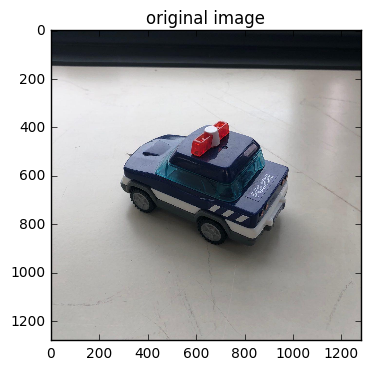

In [31]:
plt.imshow(RGB_img)
plt.title('original image')
plt.show()

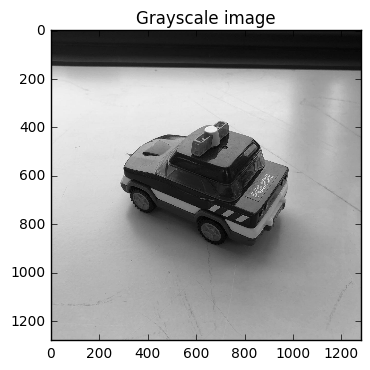

In [32]:
plt.imshow(GRAY_img, cmap='gray')
plt.title('Grayscale image')
plt.show()

Here ! You can see the image above!

# 2. Basic Gaussian Convolution Filter

In this example you can make the basic 3x3 gaussian convolution filter

In [12]:
import numpy as np

In [13]:
filter_img = cv2.imread('filter_example.tif')
GRAY_img = cv2.cvtColor(filter_img, cv2.COLOR_BGR2GRAY)


In [14]:
conv_filter = np.array([[1/16,2/16,1/16],[2/16,4/16,2/16],[1/16,2/16,1/16]])
print(conv_filter)

[[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]


We are going to use this 3x3 filter.

### First, we use grayscale image for simplicity.

In [15]:
convolved_image = signal.convolve2d(GRAY_img, conv_filter, mode='same')

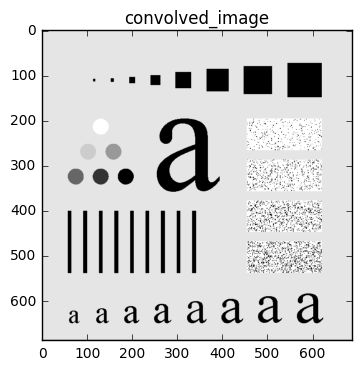

In [16]:
plt.imshow(convolved_image, cmap='gray')
plt.title('convolved_image')
plt.show()

Hmm... it seems that it doesn't change any...  
Let's try 5x5 Gaussian filter (blur).

In [17]:
conv_filter2 = np.array([[1/256, 4/256, 6/256, 4/256, 1/256],[4/256, 16/256, 24/256, 16/256, 4/256],[6/256, 24/256, 36/256, 24/256, 6/256],[4/256, 16/256, 24/256, 16/256, 4/256],[1/256, 4/256, 6/256, 4/256, 1/256]])
print(conv_filter2)

[[0.00390625 0.015625   0.0234375  0.015625   0.00390625]
 [0.015625   0.0625     0.09375    0.0625     0.015625  ]
 [0.0234375  0.09375    0.140625   0.09375    0.0234375 ]
 [0.015625   0.0625     0.09375    0.0625     0.015625  ]
 [0.00390625 0.015625   0.0234375  0.015625   0.00390625]]


Sorry for long code...

In [18]:
convolved_image2 = signal.convolve2d(GRAY_img, conv_filter2, mode='same')

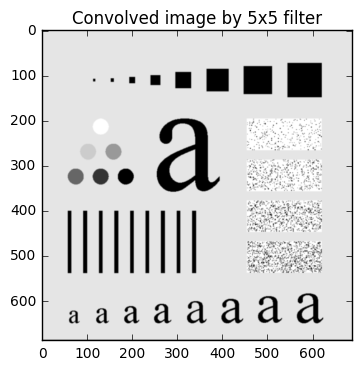

In [19]:
plt.imshow(convolved_image2,  cmap='gray')
plt.title('Convolved image by 5x5 filter')
plt.show()

In [20]:
difference_image = convolved_image - GRAY_img

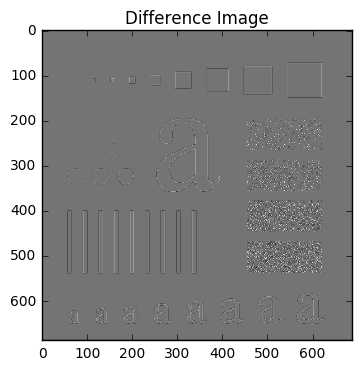

In [21]:
plt.imshow(difference_image, cmap='gray')
plt.title('Difference Image')
plt.show()

Now it can be seen the 'diffence' well.

# 3. Laplacian of Gaussian


$$
L(x,y)=\nabla^{2}{f(x,y)} = \frac{\partial^{2}{f(x,y)}}{\partial{x^{2}}} + \frac{\partial^{2}{f(x,y)}}{\partial{y^{2}}}
$$

Basic 3x3 Laplacian filter is look like this.  
$$
\begin{bmatrix}
0 & 1 & 0 \\
1 & -4 & 1 \\
0 & 1 & 0 
\end{bmatrix}
$$

In [33]:
laplacian_filter = np.array([[0,1,0],[1,-4,1],[0,1,0]])
print(laplacian_filter)

[[ 0  1  0]
 [ 1 -4  1]
 [ 0  1  0]]


In [34]:
laplacian_image = signal.convolve2d(GRAY_img, laplacian_filter, mode='same')

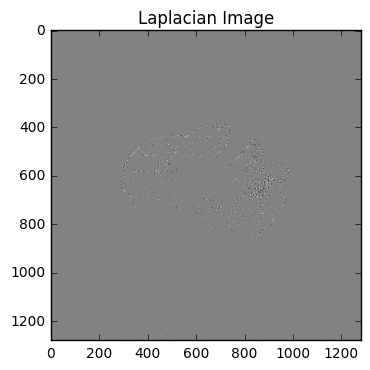

In [35]:
plt.imshow(laplacian_image, cmap='gray')
plt.title('Laplacian Image')
plt.show()

You can see the EDGE of the image.

# 4. Difference of Gaussian (DoG)

In [56]:
import matplotlib.mlab as mlab

With first $\sigma_{1} = 1$ you can get the gaussian PDF like below

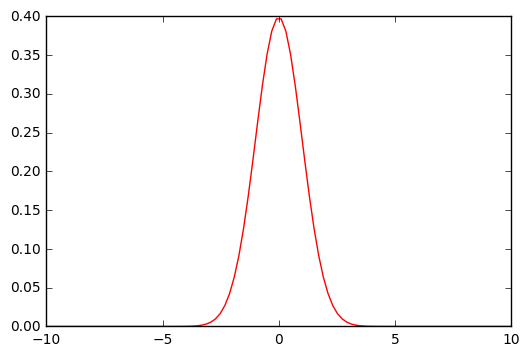

In [67]:
average = 0
variance = 1
sigma = np.sqrt(variance)
x = np.linspace (average -10 * sigma, average + 10* sigma, 100)
plt.plot(x,mlab.normpdf(x,average, sigma), 'r')
plt.show()

with second $\sigma_{2} = 2$

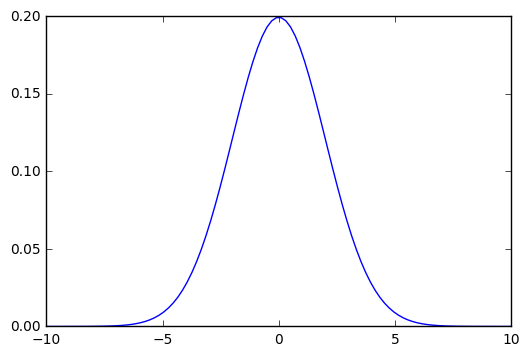

In [68]:
sigma2 = 2
plt.plot(x,mlab.normpdf(x, average, sigma2))
plt.show()

Let's draw both graph together

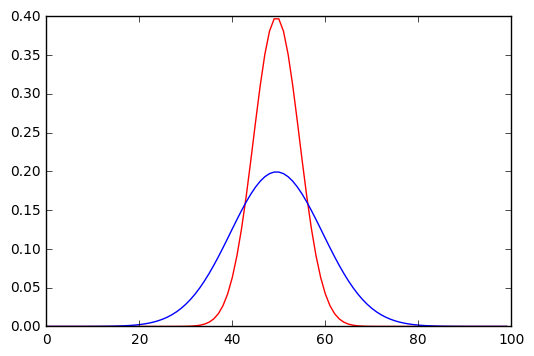

In [69]:
gaussian_1 = mlab.normpdf(x, average, sigma)
gaussian_2 = mlab.normpdf(x, average, sigma2)
plt.plot(gaussian_1, 'r', gaussian_2, 'b')
plt.show()

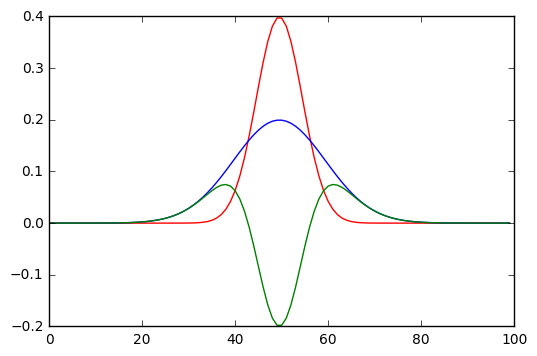

In [70]:
diff_gaussian = gaussian_2 - gaussian_1
plt.plot(gaussian_1, 'r', gaussian_2, 'b', diff_gaussian, 'g')
plt.show()

5x5 Gaussian filter with sigma 1
$$
\begin{bmatrix}
0.003765 & 0.015019 & 0.023792 & 0.015019 & 0.003765 \\
0.015019 & 0.059912 & 0.094907 & 0.059912 & 0.015019 \\
0.023792 & 0.094907 & 0.150342 & 0.094907 & 0.023792 \\
0.015019 & 0.059912 & 0.094907 & 0.059912 & 0.015019 \\
0.003765 & 0.015019 & 0.023792 & 0.015019 & 0.003765 
\end{bmatrix}
$$

In [ ]:
gaussian_1 = np.array([[0.003765, 0.015019, 0.023792, 0.015019, 0.003765 
0.015019 0.059912 0.094907 0.059912 0.015019 
0.023792 0.094907 0.150342 0.094907 0.023792 
0.015019 0.059912 0.094907 0.059912 0.015019 
0.003765 0.015019 0.023792 0.015019 0.003765 
])

5x5 Gaussian filter with sigma 2 is :
$$
\begin{bmatrix}
0.023528 & 0.033969 & 0.038393 & 0.033969 & 0.023528 \\ 
0.033969 & 0.049045 &0.055432 & 0.049045 & 0.033969 \\
0.038393 & 0.055432 & 0.062651 & 0.055432 & 0.038393 \\
0.033969 & 0.049045 & 0.055432 & 0.049045 & 0.033969 \\
0.023528 & 0.033969 & 0.038393 & 0.033969 & 0.023528 
\end{bmatrix}
$$

to simply we gonna use scipy library  
we use dirac delta function to get gaussian kernel value

In [74]:
from scipy.ndimage import filters

In [76]:
def gkern2d(size, sig):
    input = np.zeros((size, size))
    input[size//2, size//2] = 1
    return filters.gaussian_filter(input, sig)

In [86]:
gaussian_1 = gkern2d(5, 1)
print(gaussian_1)

[[0.00341325 0.01414451 0.02330747 0.01414451 0.00341325]
 [0.01414451 0.05861496 0.09658632 0.05861496 0.01414451]
 [0.02330747 0.09658632 0.15915589 0.09658632 0.02330747]
 [0.01414451 0.05861496 0.09658632 0.05861496 0.01414451]
 [0.00341325 0.01414451 0.02330747 0.01414451 0.00341325]]


In [87]:
gaussian_2 = gkern2d(5, 2)
print(gaussian_2)

[[0.03468932 0.03822752 0.04041701 0.03822752 0.03468932]
 [0.03822752 0.04212661 0.04453941 0.04212661 0.03822752]
 [0.04041701 0.04453941 0.04709041 0.04453941 0.04041701]
 [0.03822752 0.04212661 0.04453941 0.04212661 0.03822752]
 [0.03468932 0.03822752 0.04041701 0.03822752 0.03468932]]


Then finally, we can define the Difference of Gaussian function as below : 

In [84]:
def dog(size, sigma1, sigma2):
    gauss1 = gkern2d(size, sigma1)
    gauss2 = gkern2d(size, sigma2)
    return gauss1 - gauss2

In [85]:
dog(5, 1, 2)

array([[-0.03127607, -0.02408301, -0.01710954, -0.02408301, -0.03127607],
       [-0.02408301,  0.01648835,  0.0520469 ,  0.01648835, -0.02408301],
       [-0.01710954,  0.0520469 ,  0.11206548,  0.0520469 , -0.01710954],
       [-0.02408301,  0.01648835,  0.0520469 ,  0.01648835, -0.02408301],
       [-0.03127607, -0.02408301, -0.01710954, -0.02408301, -0.03127607]])

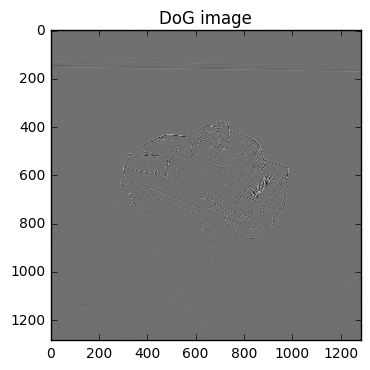

In [89]:
dog_image = signal.convolve2d(GRAY_img, dog(5,1,2))
plt.imshow(dog_image, cmap='gray')
plt.title('DoG image')
plt.show()

Now you can see the strong EDGE by DoG filter.

Difference of Gaussian filter act like band pass filter.  
It rejects high frequency which means noise of the image.  
It also rejects low frequency which means the homogeneous area.  
Since this filter passes only edge-like feature, it works as an Edge detector.  